# Linear Discriminant Analysis(LDA)

In [26]:
import warnings
warnings.filterwarnings("ignore")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import pandas as pd

In [3]:
df_wine = datasets.load_wine()
X = df_wine.data
y = df_wine.target
target_names = df_wine.target_names
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [28]:
print(df_wine.feature_names)
print(target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

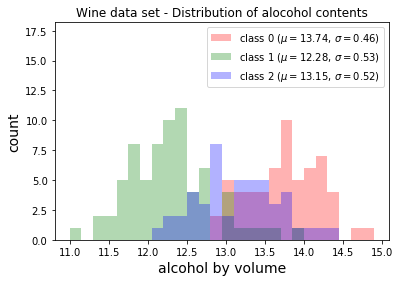

In [5]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])

for label,color in zip(range(0,3), colors):
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    hist(X[:,0][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

ylim([0, max_bin*1.3])
title('Wine data set - Distribution of alocohol contents')
xlabel('alcohol by volume', fontsize=14)
ylabel('count', fontsize=14)
legend(loc='upper right')

show()

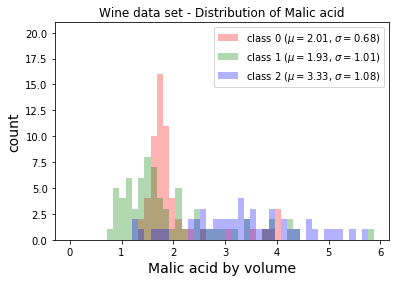

In [6]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.12
bins = np.arange(floor(min(X[:,1])), ceil(max(X[:,1])), 0.12)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,1], bins=bins)[0])

for label,color in zip(range(0,3), colors):
    mean = np.mean(X[:,1][y == label]) # class sample mean
    stdev = np.std(X[:,1][y == label]) # class standard deviation
    hist(X[:,1][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

ylim([0, max_bin])
title('Wine data set - Distribution of Malic acid')
xlabel('Malic acid by volume', fontsize=14)
ylabel('count', fontsize=14)
legend(loc='upper right')

show()

In [7]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0, 3):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 0: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]



In [8]:
X_train_std

array([[ 0.9108, -0.4626, -0.0114, ...,  0.6571,  1.9435,  0.937 ],
       [-0.9561, -0.9661, -1.5373, ..., -0.4086,  0.5812, -1.4134],
       [ 0.3595,  1.675 , -0.3747, ..., -1.5595, -1.4485,  0.2868],
       ...,
       [-0.7055, -0.6834, -0.629 , ...,  0.4439,  0.4978, -1.3061],
       [ 1.1489, -0.6216, -0.8833, ..., -0.1955,  1.0121,  0.7745],
       [ 1.4747,  0.1116,  0.4245, ..., -1.4316, -1.2399, -0.2821]])

In [9]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [10]:
print('Class label distribution: %s' % np.bincount(y_train)[0:])

Class label distribution: [40 49 35]


In [11]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [12]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [13]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals.shape, eigen_vecs.shape

((13,), (13, 13))

In [14]:
eigen_vals

array([ 3.1118e+02+0.0000e+00j,  5.6210e+01+0.0000e+00j,
       -5.0032e-14+0.0000e+00j,  2.2479e-14+1.7144e-14j,
        2.2479e-14-1.7144e-14j, -1.7584e-14+6.1592e-15j,
       -1.7584e-14-6.1592e-15j,  1.7621e-14+0.0000e+00j,
       -3.1142e-15+0.0000e+00j, -9.6471e-16+4.2043e-15j,
       -9.6471e-16-4.2043e-15j,  4.1474e-15+7.4028e-16j,
        4.1474e-15-7.4028e-16j])

In [15]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print (eigen_val[0])

Eigenvalues in decreasing order:

311.1802582737582
56.20970145134884
5.0032386658967096e-14
2.8270466421235385e-14
2.8270466421235385e-14
1.8631070065562153e-14
1.8631070065562153e-14
1.762098213761816e-14
4.313532747970859e-15
4.313532747970859e-15
4.212981502448012e-15
4.212981502448012e-15
3.1142022184557223e-15


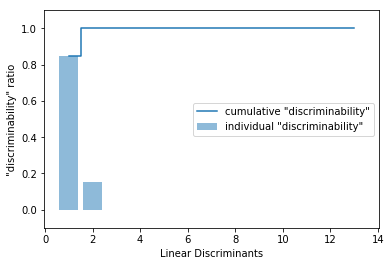

In [16]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
ylabel('"discriminability" ratio')
xlabel('Linear Discriminants')
ylim([-0.1, 1.1])
legend(loc='best')
show()

In [17]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
w

array([[ 1.6739e-01, -2.4986e-01],
       [ 2.4270e-02, -1.9703e-01],
       [ 1.2584e-01, -2.8120e-01],
       [-2.5750e-01,  1.1011e-01],
       [-6.5016e-04,  1.3279e-02],
       [-2.2678e-01, -1.3841e-01],
       [ 6.8217e-01,  6.6613e-01],
       [ 5.7658e-02,  1.0857e-01],
       [-1.3240e-01,  8.0337e-02],
       [-9.6911e-02, -3.4462e-01],
       [-2.3096e-03,  2.2648e-01],
       [ 3.4029e-01,  3.1260e-01],
       [ 4.7583e-01, -2.4179e-01]])

In [18]:
X_train_lda = X_train_std.dot(w)

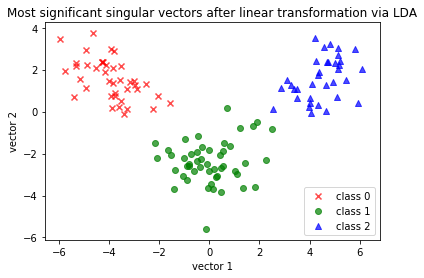

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

for label,marker,color in zip(range(0,3),('x', 'o', '^'),('red', 'green', 'blue')):
    scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker, color=color,
                alpha=0.7, label='class {}'.format(label))

xlabel('vector 1')
ylabel('vector 2')

legend(loc='lower right')
title('Most significant singular vectors after linear transformation via LDA')

show()

In [20]:
transf_lda.shape

(124, 2)

In [21]:
X_test= sklearn_lda.transform(X_test)

In [22]:
X_test.shape

(54, 2)

In [23]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
tree1=tree.DecisionTreeClassifier()
dt_model=tree1.fit(transf_lda,y_train)
pred=dt_model.predict(X_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))

0.9814814814814815
[[18  0  0]
 [ 1 22  0]
 [ 0  0 13]]


In [24]:
#Support Vector Machine
from sklearn import svm
clf = svm.SVC()
svc_model = clf.fit(transf_lda,y_train)
sv_pred=svc_model.predict(X_test)
print(accuracy_score(sv_pred,y_test))
print(confusion_matrix(sv_pred,y_test))

1.0
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


In [25]:
#from the above results, we can observe that Decision Trees is giving 98% accuracy where as Support Vector Machine is giving 100% accuracy after performing LDA.